Pierre Navaro - [Institut de Recherche Mathématique de Rennes](https://irmar.univ-rennes1.fr) - [CNRS](http://www.cnrs.fr/)

# References

- [SciPy 2017 tutorial](https://youtu.be/5jzIVp6bTy0)

The function init_printing() will enable LaTeX pretty printing in the notebook for SymPy expressions.

In [7]:
from sympy import *
import sympy as sym
init_printing()

In [8]:
x= Symbol('x')

(pi + x)**2

In [9]:
alpha1, omega_2 = symbols('alpha1 omega_2')
alpha1, omega_2

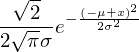

In [10]:
mu, sigma = symbols('mu sigma', positive = True)
1/sqrt(2*pi*sigma**2)* exp(-(x-mu)**2/(2*sigma**2))

# Why use `sympy`?
- Symbolic derivatives
- Translate mathematics into low level code
- Deal with very large expressions
- Optimize code using mathematics

Dividing two integers in Python creates a float, like 1/2 -> 0.5. If you want a rational number, use Rational(1, 2) or S(1)/2.

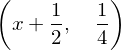

In [11]:
x + S(1)/2 , Rational(1,4)

In [12]:
y = Symbol('y')
x ^ y # XOR operator (True only if x != y)

In [13]:
x**y

SymPy expressions are immutable. Functions that operate on an expression return a new expression.

In [14]:
expr = x + 1
expr

In [15]:
expr.subs(x, 2)

In [16]:
expr

Evaluate a floating point approximation up to a user specified number of digits.

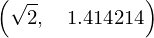

In [17]:
sqrt(2), sqrt(2).evalf(7)

In [18]:
fibonacci(100)

## Undefined functions and derivatives

Undefined functions are created with `Function()`. Undefined are useful to state that one variable depends on another (for the purposes of differentiation).

In [19]:
f = Function('f')

In [20]:
f(x) + 1

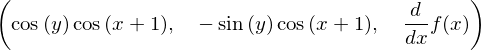

In [21]:
diff(sin(x + 1)*cos(y), x), diff(sin(x + 1)*cos(y), x, y), diff(f(x), x)

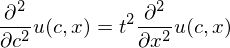

In [22]:
c, t = symbols('t c')
u = Function('u')
Eq(diff(u(t,x),t,t), c**2*diff(u(t,x),x,2))

# Matrices

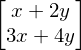

In [23]:
Matrix([[1, 2], [3, 4]])*Matrix([x, y])

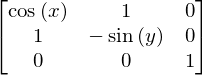

In [24]:
x, y, z = symbols('x y z')
Matrix([sin(x) + y, cos(y) + x, z]).jacobian([x, y, z])

## Matrix symbols

SymPy can also operate on matrices of symbolic dimension ($n \times m$). `MatrixSymbol("M", n, m)` creates a matrix $M$ of shape $n \times m$. 

In [25]:
n, m = symbols('n m', integer=True)
M = MatrixSymbol("M", n, m)
b = MatrixSymbol("b", m, 1)
Transpose(M*b)

In [26]:
Transpose(M*b).doit()

## Solving systems of equations

`solve` solves equations symbolically (not numerically). The return value is a list of solutions. It automatically assumes that it is equal to 0.

In [27]:
solve(Eq(x**2, 4), x)


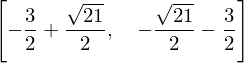

In [28]:
solve(x**2 + 3*x - 3, x)

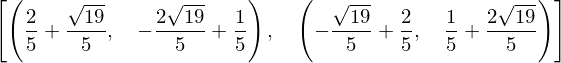

In [29]:
eq1 = x**2 + y**2 - 4  # circle of radius 2
eq2 = 2*x + y - 1  # straight line: y(x) = -2*x + 1
solve([eq1, eq2], [x, y])

## Solving differential equations
`dsolve` can (sometimes) produce an exact symbolic solution. Like `solve`, `dsolve` assumes that expressions are equal to 0. 

In [30]:
f = Function('f')
dsolve(f(x).diff(x, 2) + f(x))

## Code printers
The most basic form of code generation are the code printers. They convert SymPy expressions into over a dozen target languages.


In [31]:
x = symbols('x')
expr = abs(sin(x**2))
expr

In [32]:
ccode(expr)

'fabs(sin(pow(x, 2)))'

In [33]:
fcode(expr, standard=2003, source_format='free')

'abs(sin(x**2))'

In [34]:
from sympy.printing.cxxcode import cxxcode
cxxcode(expr)

'fabs(sin(std::pow(x, 2)))'

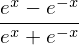

In [35]:
tanh(x).rewrite(exp)

In [36]:
expr = 1/sqrt(2*pi*sigma**2)* exp(-(x-mu)**2/(2*sigma**2))
print(fcode(expr, standard=2003, source_format='free'))

parameter (pi = 3.14159265358979d0)
(1.0d0/2.0d0)*sqrt(2.0d0)*exp(-0.5d0*(-mu + x)**2/sigma**2)/(sqrt(pi)* &
      sigma)


In [37]:
binomial_coefficients(3)

## Creating a function from a symbolic expression
In SymPy there is a function to create a Python function which evaluates (usually numerically) an expression. SymPy allows the user to define the signature of this function (which is convenient when working with e.g. a numerical solver in ``scipy``).

In [38]:
x, y = symbols('x y')
expr = 3*x**2 + log(x**2 + y**2 + 1)
expr

In [39]:
%timeit expr.subs({x: 17, y: 42}).evalf()

227 µs ± 16.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [40]:
import math
f = lambda x, y: 3*x**2 + math.log(x**2 + y**2 + 1)
f(17, 42)

In [41]:
%timeit f(17, 42)

1.01 µs ± 26 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


Evaluate above expression numerically invoking the subs method followed by the evalf method can be quite slow and cannot be done repeatedly.

In [42]:
g = lambdify([x, y], expr, modules=['math'])
g(17, 42)

In [43]:
%timeit g(17, 42)

979 ns ± 17.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [44]:
import numpy as np
xarr = np.linspace(17, 18, 5)
h = lambdify([x, y], expr)
out = h(xarr, 42)
out.shape

In [45]:
z = z1, z2, z3 = symbols('z:3')
expr2 = x*y*(z1 + z2 + z3)
func2 = lambdify([x, y, z], expr2)
func2(1, 2, (3, 4, 5))

Behind the scenes lambdify constructs a string representation of the Python code and uses Python's eval function to compile the function.

SIR model with respect to time t and variables X for constant population
Order of variables in $X : [S, I, R]$

$$
\frac{dS}{dt} = - \beta  S I \\
\frac{dI}{dt} = \beta  S I -  \gamma I \\
\frac{dR}{dt} = \gamma I
$$

- X: values of the variables (ratio of suceptibles, infectious and recovered fraction of the population)
- t: time (not used because autonomous ODE)
- $\beta$ : transmission coefficient.
- $\gamma$ : healing rate.


### Solving the initial value problem numerically
We will now integrate this system of ordinary differential equations numerically using the ``odeint`` solver provided by ``scipy``:


In [46]:
import numpy as np
from scipy.integrate import odeint

By looking at the [documentation](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.integrate.odeint.html) of odeint we see that we need to provide a function which computes a vector of derivatives ($\dot{\mathbf{y}} = [\frac{dy_1}{dt}, \frac{dy_2}{dt}, \frac{dy_3}{dt}]$). The expected signature of this function is:

    f(y: array[float64], t: float64, *args: arbitrary constants) -> dydt: array[float64]
    
in our case we can write it as:

In [47]:
def rhs(y, t, beta, gamma):
    rb = beta * y[0]*y[1]
    rg = gamma * y[1]
    return [- rb , rb - rg, rg]

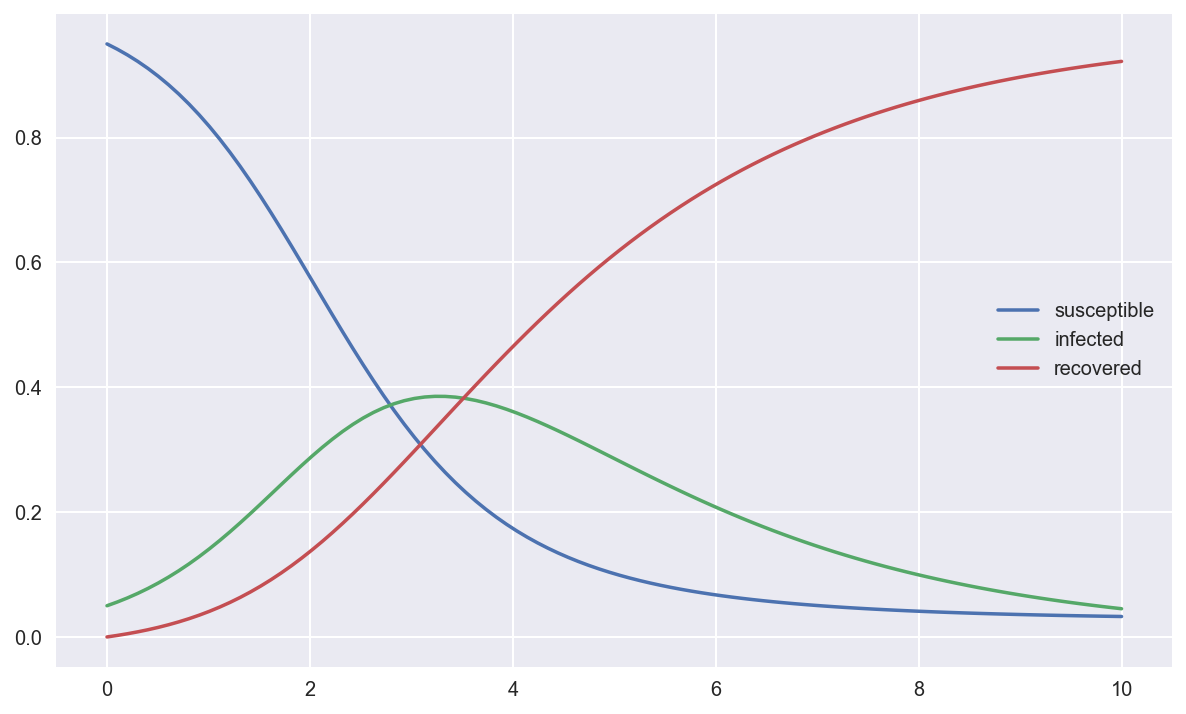

In [48]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)

tout = np.linspace(0, 10, 100)
k_vals = 1.66, 0.4545455
y0 = [0.95, 0.05, 0]
yout = odeint(rhs, y0, tout, k_vals)
plt.plot(tout, yout)
_ = plt.legend(['susceptible', 'infected', 'recovered']);

We will construct the system from a symbolic representation. But at the same time, we need the ``rhs`` function to be fast. Which means that we want to produce a fast function from our symbolic representation. Generating a function from our symbolic representation is achieved through *code generation*. 

1. Construct a symbolic representation from some domain specific representation using SymPy.
2. Have SymPy generate a function with an appropriate signature (or multiple thereof), which we pass on to the solver.

We will achieve (1) by using SymPy symbols (and functions if needed). For (2) we will use a function in SymPy called ``lambdify``―it takes a symbolic expressions and returns a function. In a later notebook, we will look at (1), for now we will just use ``rhs`` which we've already written:

In [49]:
import sympy as sym
sym.init_printing()

In [64]:
y, k = sym.symbols('y:3'), sym.symbols('beta gamma')
ydot = rhs(y, None, *k)
y, ydot

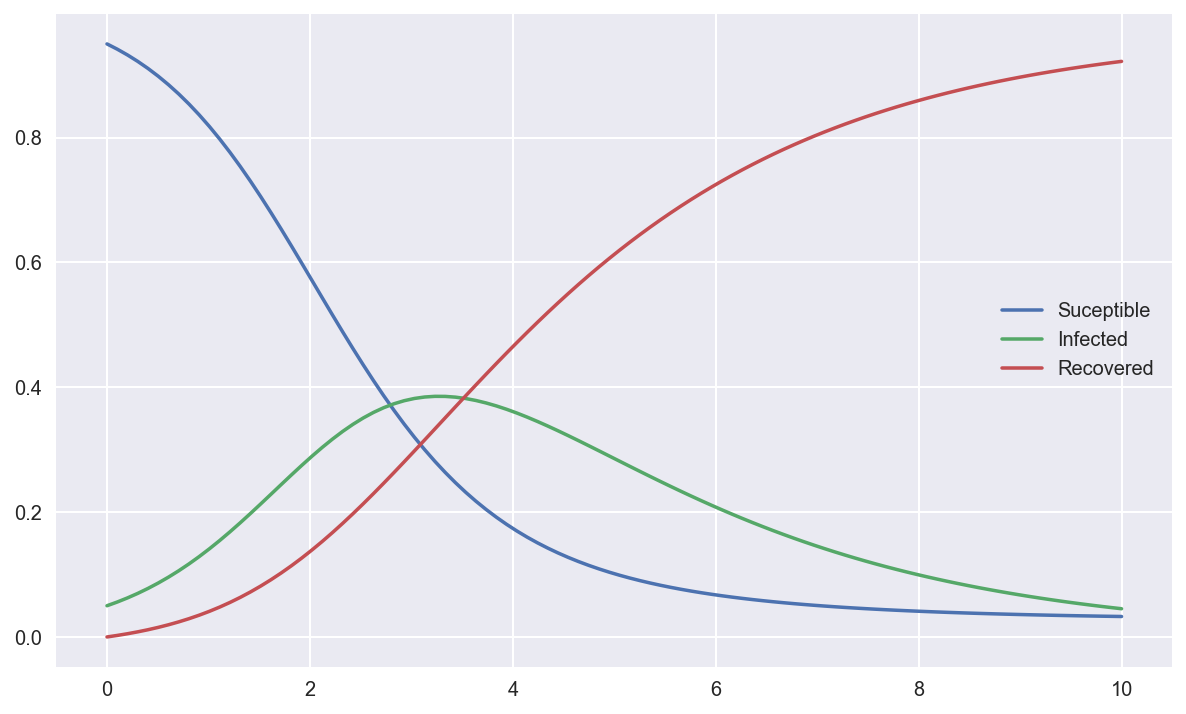

In [65]:
f = sym.lambdify((y,t)+k, ydot)
plt.plot(tout, odeint(f, y0, tout, k_vals))
_ = plt.legend(['Suceptible', 'Infected', 'Recovered'])

In this example the gains of using a symbolic representation are arguably limited. Let's take the same example with demography and $n$ classes of subjects :

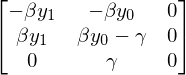

In [66]:
sym.Matrix(ydot).jacobian(y)

$$
X_i = S_i, I_i, R_i  \qquad i = 1 \ldots n 
$$

$$
    \frac{dS_i}{dt} = \nu_i - \beta_i S_i I_i - \mu_i S_i + 
    \sum_{j=1}^n m_{ji} S_j-\sum_{j=1}^n m_{ij} S_i \\
    \frac{dI_i}{dt} = \beta_i S_i I_i - (\gamma_i + \mu_i) I_i +
    \sum_{j=1}^n m_{ij} I_j-\sum_{j=1}^n m_{ji} I_i \\
    \frac{dR_i}{dt} = - \frac{dS_i}{dt} - \frac{dI_i}{dt}
$$

- $\beta$  : transmission coefficient
- $\gamma$ : healing rate
- $\mu$    : mortality rate
- $\nu$    : birth rate
        

In [244]:
import sympy as sym
n = 3
m = sym.Matrix(n*n*[0.01]).reshape(n,n) - sym.Matrix.diag(n*[0.01])
y = sym.symbols('y:{}'.format(3*n), real=True, nonnegative=True, )
nu = sym.symbols('nu:{}'.format(n))
mu = sym.symbols('mu:{}'.format(n))
beta = sym.symbols('beta:{}'.format(n))
gamma = sym.symbols('gamma:{}'.format(n))


In [245]:
#dS/dt
ydot = [nu[k] - beta[k]*y[k]*y[k+n] - mu[k]*y[k] 
        + sum(sym.Matrix(y[:n]).T * m) 
        - sum(m @ sym.Matrix(y[:n])) for k in range(n)]
#dI/dt
ydot += [beta[k] * y[k+n] * y[k]- (gamma[k] + mu[k])*y[k+n]  
        + sum( m @ sym.Matrix(y[n:2*n])) 
        - sum(sym.Matrix(y[n:2*n]).T @ m ) for k in range(n)]
#dR/dt
ydot += [ - nu[k] + gamma[k]*y[k+n] for k in range(n)]
    
ydot

In [240]:

f = sym.lambdify((y,t)+nu+mu+beta+gamma, ydot)


In [241]:
tout = np.linspace(0, 10, 100)
nu = n*[0.0]
mu = n*[0.0]
beta = [1.66 for i in range(n)]
gamma = [0.4545-0.1*i for i in range(n)]
k_vals = (*nu, *mu, *beta, *gamma)
y0 = n*[0.95]+n*[0.05]+n*[0]
y0

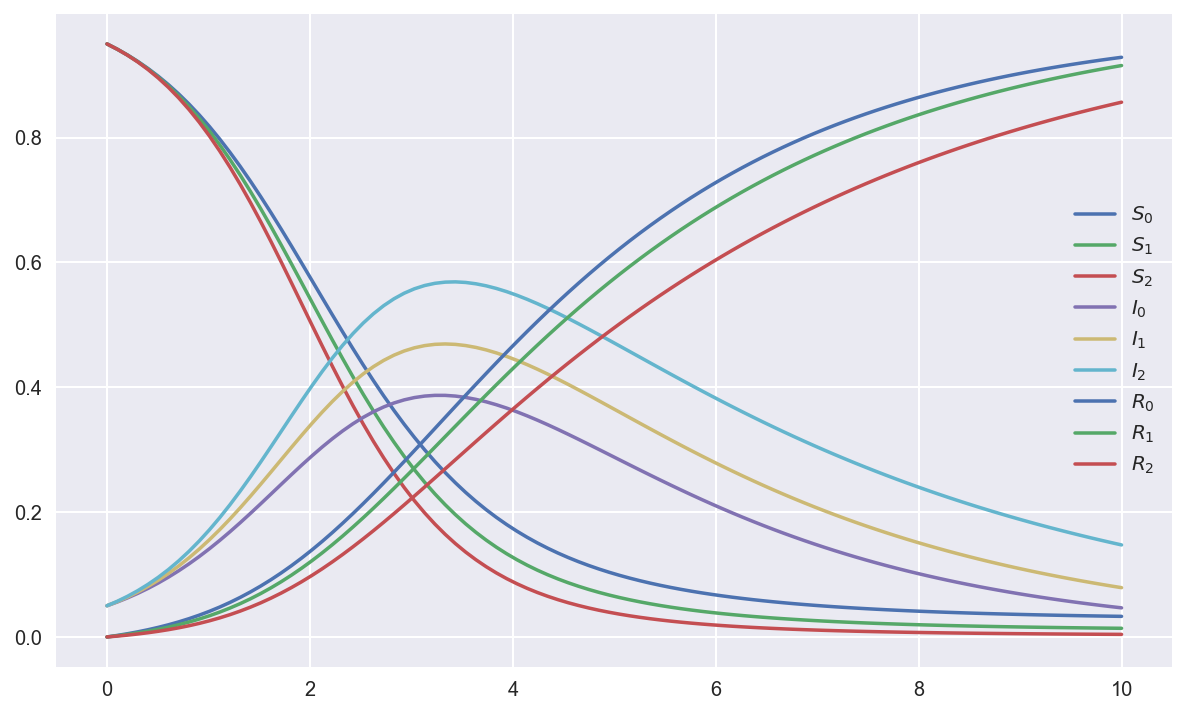

In [242]:
legends = ['$S_{}$'.format(i) for i in range(n)]
legends += ['$I_{}$'.format(i) for i in range(n)]
legends += ['$R_{}$'.format(i) for i in range(n)]
plt.plot(tout, odeint(f, y0, tout, k_vals))
_ = plt.legend(legends)

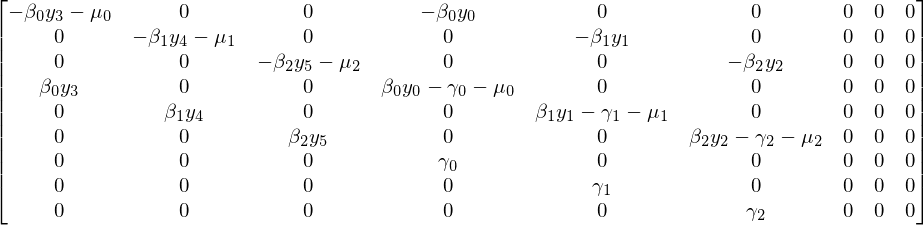

In [246]:
J = sym.Matrix(ydot).jacobian(y)
J

In [248]:
from sympy.integrals.quadrature import gauss_legendre
x, w = gauss_legendre(3, 5)
x,w

In [249]:
x, w = gauss_legendre(4, 5)
x, w

In [252]:
d = 3
knots = range(10)
b0 = sym.bspline_basis(d, knots, 0, x)
f = sym.lambdify(x, b0)
y = f(0.5)

TypeError: unsupported operand type(s) for -: 'Integer' and 'list'